In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

<h2>Linear Regression using Scikit Learn</h2>

In [96]:
house_price = pd.read_csv('house_prices.csv', header =None, names= ['area', 'noOfBedrooms', 'price'])
house_price.head()

,area,noOfBedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [97]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
area            47 non-null int64
noOfBedrooms    47 non-null int64
price           47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [98]:
house_price.describe()

,area,noOfBedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


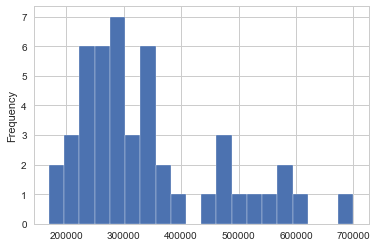

In [99]:
house_price['price'].plot.hist(bins= 20, edgecolor='w' )

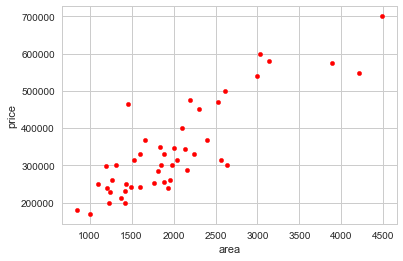

In [100]:
house_price.plot.scatter(x='area', y='price', color='r')

<h3> Preprocessing </h3>
<b> We can either use Standard Scaler or Min Max </b>

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()
temp = scaler.fit_transform(house_price)

In [103]:
house_prices_scaled = pd.DataFrame(temp, columns=['area', 'noOfBedrooms', 'price'])
house_prices_scaled.head()

,area,noOfBedrooms,price
0,0.131415,-0.226093,0.480890
1,-0.509641,-0.226093,-0.084983
2,0.507909,-0.226093,0.231097
3,-0.743677,-1.554392,-0.876398
4,1.271071,1.102205,1.612637


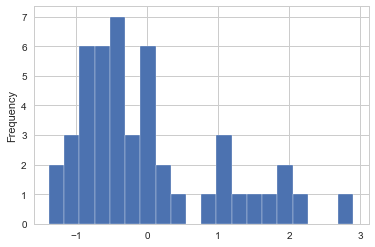

In [104]:
house_prices_scaled['price'].plot.hist(bins= 20, edgecolor='w' )

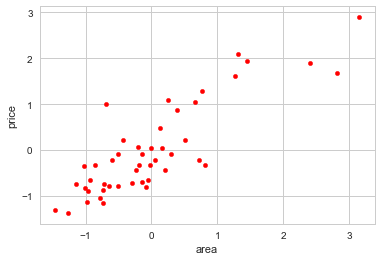

In [105]:
# The plot appers to be similar as the raw data but the scales are now changed to a consistent range.
house_prices_scaled.plot.scatter(x='area', y='price', color='r')

In [106]:
house_prices_scaled.describe()

,area,noOfBedrooms,price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,9.448707e-18,2.710598e-16,-6.614095e-17
std,1.010811e+00,1.010811e+00,1.010811e+00
min,-1.461049e+00,-2.882690e+00,-1.378409e+00
25%,-7.233261e-01,-2.260934e-01,-7.316961e-01
50%,-1.433229e-01,-2.260934e-01,-3.275006e-01
75%,3.412850e-01,1.102205e+00,3.559938e-01
max,3.150993e+00,2.430504e+00,2.906063e+00


In [107]:
# We cam do min max scaling too
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler(feature_range=(-1,1))
house_prices_min_max = pd.DataFrame(scaler_min_max.fit_transform(house_price), columns=house_price.columns)
house_prices_min_max.head()

,area,noOfBedrooms,price
0,-0.309432,0.0,-0.132075
1,-0.587424,0.0,-0.396226
2,-0.146167,0.0,-0.248679
3,-0.688913,-0.5,-0.765660
4,0.184777,0.5,0.396226


In [108]:
house_prices_min_max.describe()

,area,noOfBedrooms,price
count,47.000000,47.000000,47.000000
mean,-0.366420,0.085106,-0.356556
std,0.438336,0.380491,0.471849
min,-1.000000,-1.000000,-1.000000
25%,-0.680088,0.000000,-0.698113
50%,-0.428571,0.000000,-0.509434
75%,-0.218423,0.500000,-0.190377
max,1.000000,1.000000,1.000000


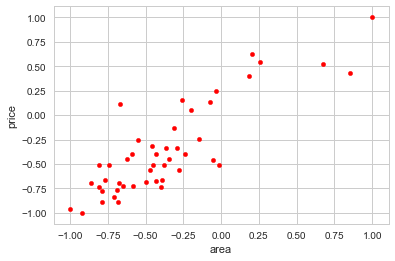

In [109]:
house_prices_min_max.plot.scatter(x='area', y='price', color='r')

In [110]:
X = house_prices_scaled['area']
y = house_prices_scaled['price']

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X.head()

0    0.131415
1   -0.509641
2    0.507909
3   -0.743677
4    1.271071
Name: area, dtype: float64

In [111]:
# Create and fit the model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train.values.reshape((X_train.shape[0], 1)), y_train) # we need to reshape it since only one feature

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
print (linreg.coef_, linreg.intercept_)

[ 0.93719148] 0.0751600206616


In [113]:
# Do predictions
y_pred = linreg.predict(X_test.values.reshape((X_test.shape[0], 1))                                            )

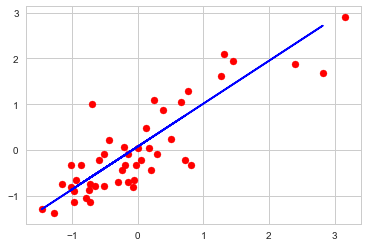

In [114]:
# Evaluate
fig, axes = pp.subplots()
axes.scatter(X, y, color='r')
axes.plot(X_test, y_pred, color='b', marker='x')

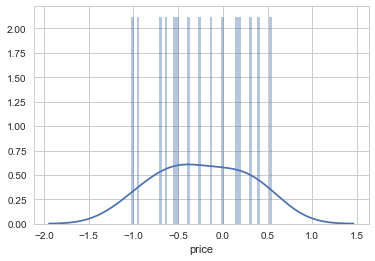

In [115]:
# the distribution of the residuals is gaussian which is a good sign although this can be improved.
sns.distplot((y_test - y_pred), bins=50) 

In [116]:
# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error 0.450486123664
Mean Squared Error 0.284889363588
Root Mean Squared Error 0.533750282049


In [140]:
# Lets try to predict a price of the house based on its area 
num_samples = 5

# first we need to scale the new samples. NOTE we have to provide the exact columns to scaler as during fit()
# which in this case wa 3 columns.
# the area values were 1st column in the dataframe supplied to fit() so we keep the sample as first column
# and create dummy (zeros) for 2nd and third column
sample_prices = np.column_stack((np.array([1000,2000, 3000,4000,5000]), np.zeros(num_samples), np.zeros(num_samples)))
print(sample_prices)
sample_scaled = scaler.transform(sample_prices)[:, 0].reshape(num_samples,1)

# the results of prediction will also be scaled. so in order to get actual predictions we
# have to create again a array with same number of columns as supplied to the scaler fit() method.
# we create dummy columns (zeros) for 1st and 2nd and put the scaled predictions in 3rd column since this was 
# our target variable (price) in the data frame supplied to scaler fit() method
predictions_scaled =np.column_stack((np.zeros(num_samples), np.zeros(num_samples),linreg.predict(sample_scaled)))
predictions = scaler.inverse_transform(predictions_scaled)[:, -1]
predictions

[[ 1000.     0.     0.]
 [ 2000.     0.     0.]
 [ 3000.     0.     0.]
 [ 4000.     0.     0.]
 [ 5000.     0.     0.]]


array([ 202150.3518129 ,  349609.7468506 ,  497069.1418883 ,
        644528.53692599,  791987.93196369])

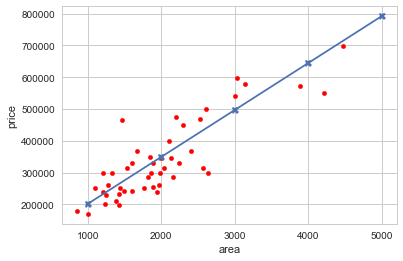

In [141]:
# See our predictions in combination with the original data.
fig, axes = pp.subplots()
house_price.plot.scatter(x='area', y='price', color ='r', ax=axes)
axes.plot(sample_prices[:, 0], predictions, marker = 'X')

array([[  2.00068085e+03,   3.17021277e+00,   2.02150352e+05]])